# Datan analysointi S2020 - Tehtävät kerta 7

**Opiskelijan nimi:**

Harjoituskerran 7 tehtävistä palautetaan Moodleen tiedosto muodossa **harjoitus7_etunimi_sukunimi.ipynb**. Jokaiseen vastattuun tehtävään tulee ajaa niiden ratkaisut näkyville. Vain ajetut ratkaisut voidaan arvioida. Tehtäväsi arvioidaan pistein:

* 1,0 p. Vastaus on täysin oikein.
* 0,5 p. Vastaus on osittain oikein.
* 0 p. Vastaus on väärin.

**Tehtävissä ei tule käyttää silmukkarakenteita.** Sen sijaan tämän harjoituksen tehtävät kirjoitetaan ilman funktiorakennetta (skripti muodossa).


## 1. Lineaarinen regressio

Eräs kappale on tasaisesti kiihtyvässä liikkeessä ja siitä on mitattu aika liikkeelle lähdöstä sekunteina, paikka yksiköissä $m$, nopeus yksiköissä $m/s$ ja kiihtyvyys yksiköissä $m/s^2$. Tee alla olevan esimerkkikuvan kaltainen kuva, jossa
* olet käsitellyt datan lukemalla sen DataFrameen [url:sta](https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta7/harjoitukset/Motion.csv),
* jos datassa on NaN arvoja olet sijoittanut niiden paikalle arvon 0,
* vaaka-akselilla on esitetty datasta aika 'Time t / s' ja pystyakselilla on esitetty nopeus 'Velocity v / m/s',
* mitatut arvot ('Time t / s','Velocity v / m/s') näkyvät sinisellä värillä 'x' merkillä,
* mitattuihin arvoihin on sovitettu pienimmän neliösumman menetelmällä suora,
* suoran yhtälö (Fitted) ja mitatut arvot (Measured) on esitetty kuvan selitteessä ja suoran yhtälön kertoimet on esitetty neljän desimaalin tarkkuudella,
* mitattujen aika 'Time t / s' ja nopeus 'Velocity v / m/s' arvoista on laskettu korrelaatiokerroin ja kovarianssi,
* kovarianssi (Covariance) ja korrelaatiokerroin (Correlation) on pyöristetty kolmen desimaalin tarkkuuteen ja esitetty kuvassa kuvaan lisätyn tekstin avulla.

**Esimerkkikuva:**
<img src="https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta7/harjoitukset/tehtava1.svg" width="450"/>

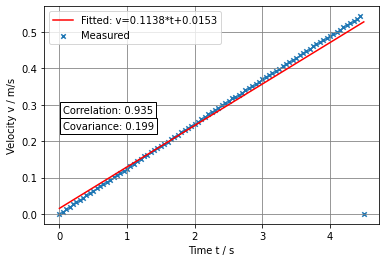

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
url='https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta7/harjoitukset/Motion.csv'
df=pd.read_csv(url, sep=';', decimal=',')
df=df.fillna(0)

df.plot.scatter('Time t / s','Velocity v / m/s',marker='x',label='Measured')
plt.grid(color='gray',linestyle='-')

malli=LinearRegression()
x=df['Time t / s'].to_frame()
y=df['Velocity v / m/s']
malli.fit(x,y)
yfit = malli.predict(x)
plt.plot(x,yfit,'r',label='Fitted: v=0.1138*t+0.0153')
plt.legend(loc='upper left')


korr=df['Time t / s'].corr(df['Velocity v / m/s'])
kov=df['Time t / s'].cov(df['Velocity v / m/s'])
korr=korr.round(3)
kov=kov.round(3)
korr='Correlation: ' + korr.astype(str)
kov='Covariance: ' + kov.astype(str)

props = dict(boxstyle='square', facecolor='white')
plt.text(0.05, 0.3, korr, fontsize=10,
        verticalalignment='top', bbox=props)
plt.text(0.05, 0.255, kov, fontsize=10,
        verticalalignment='top', bbox=props)
plt.show()


## 2. Muuttujien muunnokset ja lineaarinen regressio

Eräs kappale on tasaisesti kiihtyvässä liikkeessä ja siitä on mitattu aika liikkeelle lähdöstä sekunteina, paikka yksiköissä $m$, nopeus yksiköissä $m/s$ ja kiihtyvyys yksiköissä $m/s^2$. Tee alla olevan esimerkkikuvan kaltainen kuva, jossa
* olet käsitellyt datan lukemalla sen DataFrameen [url:sta](https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta7/harjoitukset/Motion.csv),
* jos datassa on NaN arvoja olet sijoittanut niiden paikalle arvon 0,
* vaaka-akselilla on esitetty datasta aika 'Time t / s' ja pystyakselilla on esitetty kappaleen paikka 'Path s_A1 / m',
* mitatut arvot ('Time t / s','Path s_A1 / m') näkyvät sinisellä värillä 'x' merkillä,
* mitattuihin arvoihin on sovitettu muuttujien muunnoksen ja lineaarisen regression avulla toisen asteen yhtälö,
* toisen asteen yhtälö (Fitted) ja mitatut arvot (Measured) on esitetty kuvan selitteessä ja toisen asteen yhtälön kertoimet on esitetty neljän desimaalin tarkkuudella.

Muuttujien muunnoksessa voit tehdä muunnoksen 
$$d=\sqrt{s},$$
missä $s$ on kappaleen paikka metreinä ja $d$ on uusi muuttuja, jonka avulla voidaan lineaarisen regression avulla laskea toisen asteen yhtälön termit.

**Esimerkkikuva:**
<img src="https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta7/harjoitukset/tehtava2.svg" width="450"/>

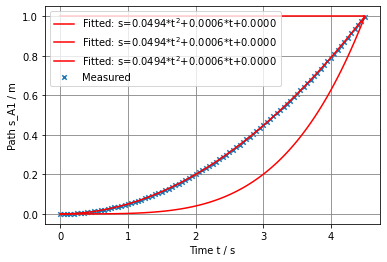

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
url='https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta7/harjoitukset/Motion.csv'
df=pd.read_csv(url, sep=';', decimal=',')
df=df.fillna(0)

df.plot.scatter('Time t / s','Path s_A1 / m',marker='x',label='Measured')
plt.grid(color='gray',linestyle='-')

poly = PolynomialFeatures(2)
malli=LinearRegression()
x=df['Time t / s'].to_frame()
y=df['Path s_A1 / m'].to_frame()
poly.fit(x,y)
yfit=poly.fit_transform(y)
plt.plot(x,yfit,'r', label='Fitted: s=0.0494*t$^2$+0.0006*t+0.0000')
plt.legend(loc='upper left')

plt.show()


## 3. Muuttujien väliset riippuvuudet

Tehtävissä 3., 4. ja 5. käsitellään [pankkilainadataa](https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta7/harjoitukset/Bank_loan.csv), joka sisältää seuraavat sarakkeet:

| Column name        | Description                                                                 |
| :--- | :--- |
| ID                 | Customer ID                                                                 |
| Age                | Customer's age in completed years                                           |
| Experience         | #years of professional experience                                           |
| Income             | Annual income of the customer (\$000)                                        |
| ZIPCode            | Home Address ZIP code.                                                      |
| Family             | Family size of the customer                                                 |
| CCAvg              | Avg. spending on credit cards per month (\$000)                              |
| Education          | Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional        |
| Mortgage           | Value of house mortgage if any. (\$000)                                      |
| Personal Loan      | Did this customer accept the personal loan offered in the last campaign?    |
| Securities Account | Does the customer have a securities account with the bank?                  |
| CD Account         | Does the customer have a certificate of deposit (CD) account with the bank? |
| Online             | Does the customer use internet banking facilities?                          |
| CreditCard         | Does the customer use a credit card issued by UniversalBank?                |

Edellä kuvatussa datassa esiintyy sarake **'Personal Loan'**, jossa asiakkaan lainatarjouksen hyväksymispäätöstä on merkitty arvolla 1 ja kieltäytymispäätöstä on merkitty arvolla 0.

Selvitä [datasta](https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta7/harjoitukset/Bank_loan.csv) seuraavat asiat:
* Kuinka paljon datassa on lainatarjouksen hyväksymis- ja kieltäytymispäätöksiä?
* Millä viidellä muuttujalla on suurin lineaarinen riippuvuus muuttujaan 'Personal Loan' verrattuna?
* Luettele kolme muuttujaparia, joilla on keskinäinen lineaarinen riippuvuus on suurinta.
* Esitä data valitsemallasi visualisointimenetelmällä, joka mielestäsi kuvaa parhaiten muuttujien välisiä lineaarisia riippuvuussuhteita.


Voit antaa vastauksesi hyvin dokumentoidun koodin muodossa.

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
url='https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta7/harjoitukset/Bank_loan.csv'
df=pd.read_csv(url, sep=';', decimal=',')
hyv=df.loc[df['Personal Loan']==1]
print(hyv['Personal Loan'].count().astype(str) + ' hyväksyttyä päätöstä')

kiel=df.loc[df['Personal Loan']==0]
print(kiel['Personal Loan'].count().astype(str) + ' kieltäytymispäätöstä')

malli=LinearRegression()
x=df['Personal Loan'].to_frame()
y=df['Personal Loan']
malli.fit(x,y)
yfit = malli.predict(x)


480 hyväksyttyä päätöstä
4520 kieltäytymispäätöstä


## 4. Logistinen regressio

Selvitä [datasta](https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta7/harjoitukset/Bank_loan.csv) kaksi muuttujaa joilla on suurimmat lineaariset riippuvuudet muuttujan 'Personal Loan' välillä. Tee kuva, jossa olet esittänyt kahden em. muuttujan välistä riippuvuutta muuttujan 'Personal loan' välillä hajontakuviolla. Tee sitten vielä logistisen regression avulla malli, jossa selittävinä muuttujina ovat vuositulot ('Income') ja luottokorttikulutus ('CCAvg') sekä selitettävänä muuttujana lainapäätös ('Personal Loan'). Mitä voit sanoa logistisen regressiomallin avulla henkilön lainatarjouksen hyväksymisestä seuraavissa tilanteissa:
* Henkilön vuositulot ovat 50 000 \\$ ja luottokorttikulutus on 1000 \\$/kk.
* Henkilön vuositulot ovat 150 000 \\$ ja luottokorttikulutus on 4000 \\$/kk.

Voit antaa vastauksesi hyvin dokumentoidun koodin muodossa.

## 5. Lainapäätös

Tee annetun [datan](https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta7/harjoitukset/Bank_loan.csv) avulla päätöspuu, joka yrittää selittää asiakkaan päätöstä lainatarjouksesta ('Personal loan'). Asiakkaan lainatarjouksen hyväksymispäätöstä on merkitty arvolla 1 ja kieltäytymispäätöstä on merkitty arvolla 0. Aseta päätöspuun muodostamisessa (DecisionTreeClassifier) puun syvyydeksi (max_depth) arvo 4 ja datasettien (luennoilla: lokerot) jakokriteeriksi **ASM** heuristiikalla suurin informaatiosaanto.

Visualisoi päätöspuu export_graphviz funktion ja [Graphviz työkalua](http://dreampuf.github.io/GraphvizOnline/) hyödyntäen. Ilmoita vastauksessasi koodi, jolla olet tuottanut tehnyt em. päätöspuun ja tuottanut siitä export_graphviz funktiolla .dot muotoisen tiedoston visualisointia varten. 

Liitä myös vastauksesi kommentteihin mitä voit sanoa seuraavien henkilöiden päätöksestä hyväksyä lainatarjous:
* Henkilön vuosittaiset tulot ('Income') ovat 50 000 \\$ ja keskimääräinen luottokorttikulutus kuukaudessa ('CCAvg') on 1 000 \\$.
* Henkilön vuosittaiset tulot ovat 150 000 \$, koulutustaso ('Education') vastaa korkeakoulutasoa ('Advanced/Professional').
* Henkilön vuosittaiset tulot ovat 100 000 \$, koulutustaso ('Education') vastaa peruskoulutustasoa ('Undergrad') ja henkilön perheessä ('Family') on kolme henkilöä.

**Lisätietoa:** Päätöspuun muodostamisessa koko datasettiä jaetaan Attribute Selection Measure (**ASM**) heuristiikan avulla pienempiin datasetteihin, jotka yrittävät selittää selitettävää muuttujaa (**Personal loan**). Selvitä päätöspuun [dokumentaatiota](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) tutkimalla kuinka datasettejä voidaan jakaa osiin, jos tavoitteena on saavuttaa suurin informaatiosaanto (**information gain**).

